# Searching

Search a STAC API with `rustac.search`.

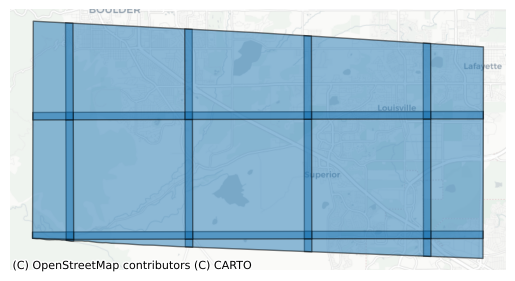

In [4]:
import contextily
import pandas
import rustac
from geopandas import GeoDataFrame

items = await rustac.search(
    "https://stac.eoapi.dev", collections="MAXAR_Marshall_Fire_21_Update"
)
data_frame = GeoDataFrame.from_features(items)
data_frame["datetime"] = pandas.to_datetime(data_frame["datetime"])
axis = data_frame.set_crs(epsg=4326).to_crs(epsg=3857).plot(alpha=0.5, edgecolor="k")
contextily.add_basemap(axis, source=contextily.providers.CartoDB.Positron)
axis.set_axis_off()

Search [stac-geoparquet](https://github.com/stac-utils/stac-geoparquet/blob/main/spec/stac-geoparquet-spec.md) with [DuckDB](https://duckdb.org/), no servers required!

In [5]:
items = await rustac.search(
    "../../data/100-sentinel-2-items.parquet",
    datetime="2024-12-01T00:00:00Z/..",
)
data_frame = GeoDataFrame.from_features(items)
data_frame["datetime"] = pandas.to_datetime(data_frame["datetime"])
data_frame[["datetime", "geometry"]]

,datetime,geometry
0,2024-12-03 17:46:29.024000+00:00,"POLYGON ((-105.36543 39.65938, -105.34153 39.7..."
1,2024-12-01 17:57:21.024000+00:00,"POLYGON ((-106.18317 40.64479, -104.88456 40.6..."


If you know you're going to a `geopandas.GeoDataFrame`(or something else that speaks arrow), you can use the `arrow` optional dependency for **rustac** (`pip install 'rustac[arrow]'`) and search directly to arrow, which can be more efficient than going through JSON dictionaries.

In [6]:
from rustac import DuckdbClient

client = DuckdbClient()
table = client.search_to_arrow(
    "../../data/100-sentinel-2-items.parquet",
    datetime="2024-12-01T00:00:00Z/..",
)
data_frame = GeoDataFrame.from_arrow(table)
data_frame[["datetime", "geometry"]]

,datetime,geometry
0,2024-12-03 10:46:29.024000-07:00,"POLYGON ((-105.36543 39.65938, -105.34153 39.7..."
1,2024-12-01 10:57:21.024000-07:00,"POLYGON ((-106.18317 40.64479, -104.88456 40.6..."
